<a href="https://colab.research.google.com/github/sherlyxdaisy/MiniProject1/blob/main/119cs21047_WPT_18_Phase_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Phase-4**

linear regression

random forest

support vector

lasso regression

decision tree classifier

(confusion matrix,accurcay,f1 score,auc-roc,precision)

**Read the data**

In [1]:
import pandas as pd

In [2]:
from google.colab import files
uploaded=files.upload()

Saving online_retail.csv to online_retail.csv


In [5]:
df=pd.read_csv('online_retail.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


**Performing EDA**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    200 non-null    object 
 1   StockCode    200 non-null    object 
 2   Description  200 non-null    object 
 3   Quantity     200 non-null    int64  
 4   InvoiceDate  200 non-null    object 
 5   UnitPrice    200 non-null    float64
 6   CustomerID   200 non-null    int64  
 7   Country      200 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 12.6+ KB


In [9]:
df.shape

(200, 8)

**Using LabelEncoder To convert the Datatypes from String to Int type**

In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['InvoiceNo']=le.fit_transform(df['InvoiceNo'])
df['StockCode']=le.fit_transform(df['StockCode'])
df['Description']=le.fit_transform(df['Description'])
df['Country']=le.fit_transform(df['Country'])
df['InvoiceDate']=le.fit_transform(df['InvoiceDate'])
df['UnitPrice']=le.fit_transform(df['UnitPrice'])


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    200 non-null    int64  
 1   StockCode    200 non-null    int64  
 2   Description  200 non-null    int64  
 3   Quantity     200 non-null    int64  
 4   InvoiceDate  200 non-null    int64  
 5   UnitPrice    200 non-null    float64
 6   CustomerID   200 non-null    int64  
 7   Country      200 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 12.6 KB


In [19]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,152,141,6,1,13,17850,2
1,0,125,143,6,1,17,17850,2
2,0,136,32,8,1,14,17850,2
3,0,135,79,6,1,17,17850,2
4,0,134,111,6,1,17,17850,2


In [21]:
df.isnull().sum()


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [167]:
df.describe()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000
mean,11.970000,79.305000,80.650000,19.435000,10.850000,14.97000,15709.230000
std,6.142291,45.897438,44.326989,50.224179,5.354517,9.04034,1862.393243
min,0.000000,0.000000,0.000000,-1.000000,0.000000,0.00000,12431.000000
25%,8.000000,37.000000,44.750000,3.000000,6.750000,8.00000,14688.000000
50%,13.000000,81.000000,79.000000,6.000000,12.000000,13.00000,15670.000000
75%,16.000000,121.250000,118.250000,12.000000,14.000000,22.00000,17850.000000
max,24.000000,155.000000,155.000000,432.000000,20.000000,39.00000,18074.000000


**Using IQR method remove the outliers**

In [76]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
print("q1 =",q1)
print("q3 =",q3)
iqr=q3-q1
print("IQR=",iqr)
ub=q1-1.5*iqr
lb=q3+1.5*iqr
print("ub=",ub)
print("lb=",lb)
df[df>ub]
df[df<lb]
df=df[df>ub]
df.describe()

q1 = InvoiceNo          8.00
StockCode         37.00
Description       44.75
Quantity           3.00
InvoiceDate        6.75
UnitPrice          8.00
CustomerID     14688.00
Country             NaN
Name: 0.25, dtype: float64
q3 = InvoiceNo         16.00
StockCode        121.25
Description      118.25
Quantity          12.00
InvoiceDate       14.00
UnitPrice         22.00
CustomerID     17850.00
Country             NaN
Name: 0.75, dtype: float64
IQR= InvoiceNo         8.00
StockCode        84.25
Description      73.50
Quantity          9.00
InvoiceDate       7.25
UnitPrice        14.00
CustomerID     3162.00
Country            NaN
dtype: float64
ub= InvoiceNo        -4.000
StockCode       -89.375
Description     -65.500
Quantity        -10.500
InvoiceDate      -4.125
UnitPrice       -13.000
CustomerID     9945.000
Country             NaN
dtype: float64
lb= InvoiceNo         28.000
StockCode        247.625
Description      228.500
Quantity          25.500
InvoiceDate       24.875
UnitPric

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,0.0
mean,11.970000,79.305000,80.650000,19.435000,10.850000,14.97000,15709.230000,NaN
std,6.142291,45.897438,44.326989,50.224179,5.354517,9.04034,1862.393243,NaN
min,0.000000,0.000000,0.000000,-1.000000,0.000000,0.00000,12431.000000,NaN
25%,8.000000,37.000000,44.750000,3.000000,6.750000,8.00000,14688.000000,NaN
50%,13.000000,81.000000,79.000000,6.000000,12.000000,13.00000,15670.000000,NaN
75%,16.000000,121.250000,118.250000,12.000000,14.000000,22.00000,17850.000000,NaN
max,24.000000,155.000000,155.000000,432.000000,20.000000,39.00000,18074.000000,NaN


**Visualizing to check the outliers**

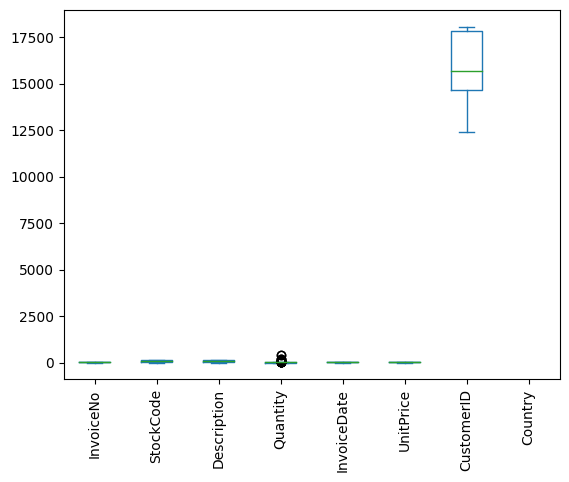

In [77]:
df.plot(kind='box')
plt.xticks(rotation=90)
plt.show()

**Use ffill & bfill to fill the null values**

and droping the country column

In [101]:
df=df.fillna(method='ffill')
df=df.fillna(method='bfill')
df = df.drop(columns=['Country'])


In [102]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
dtype: int64

**Implementing Linear Regression**

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

**Horizontal Split**

In [103]:
x=df.drop('UnitPrice',axis=1).values
y=df['UnitPrice'].values.reshape(-1,1)

In [104]:
x

array([[    0,   152,   141,     6,     1, 17850],
       [    0,   125,   143,     6,     1, 17850],
       [    0,   136,    32,     8,     1, 17850],
       ...,
       [   22,   115,    26,     6,     0, 12431],
       [   22,    25,   140,     8,     0, 12431],
       [   22,    35,   137,    12,     0, 12431]])

In [105]:
y

array([[13],
       [17],
       [14],
       [17],
       [17],
       [29],
       [22],
       [10],
       [10],
       [ 9],
       [12],
       [12],
       [19],
       [ 8],
       [22],
       [24],
       [32],
       [25],
       [25],
       [30],
       [30],
       [22],
       [24],
       [24],
       [24],
       [25],
       [19],
       [19],
       [19],
       [ 4],
       [ 3],
       [ 4],
       [ 6],
       [15],
       [15],
       [11],
       [11],
       [11],
       [ 4],
       [ 8],
       [15],
       [19],
       [ 1],
       [ 1],
       [ 3],
       [37],
       [13],
       [10],
       [10],
       [13],
       [17],
       [14],
       [24],
       [ 5],
       [ 5],
       [ 5],
       [ 5],
       [24],
       [28],
       [12],
       [13],
       [17],
       [17],
       [29],
       [22],
       [33],
       [13],
       [17],
       [14],
       [24],
       [ 5],
       [ 5],
       [ 5],
       [ 5],
       [24],
       [28],
       [12],

**Vertical Split**

In [106]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=0)

**linear regression**

In [107]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)
print("training complete")

training complete


**Finding the Coefficient and Intercept**

In [108]:
import scipy.stats as stats
import statsmodels.formula.api as smf
#intercept
c=reg.intercept_
#coefficient
m=reg.coef_
print("Intercept",c)
print("coefficent",m)

Intercept [6.35447783]
coefficent [[ 0.25852134 -0.02212574 -0.02446295 -0.03686963 -0.52583213  0.00093025]]


In [109]:
x_test

array([[    2,    32,    81,     3,     3, 13047],
       [   18,   116,    70,     6,    17, 17420],
       [   15,   140,    52,     5,    13, 15311],
       [   13,    45,    92,    24,    12, 14688],
       [   19,   150,    76,   100,    18, 16029],
       [   20,    29,   110,   432,    19, 16029],
       [    0,    97,   119,     2,     1, 17850],
       [   16,    61,   104,    10,    14, 16098],
       [    2,    96,    46,     8,     3, 13047],
       [   16,   105,     2,     2,    14, 16098],
       [    8,   135,    79,     6,     8, 17850],
       [   15,   126,    97,     3,    13, 15311],
       [   20,   101,   150,   192,    19, 16029],
       [   24,   119,   120,    -1,    15, 15311],
       [   10,    97,   119,     2,    10, 17850],
       [    1,    82,    57,     6,     2, 17850],
       [    5,     7,   122,    18,     5, 12583],
       [   15,    22,   113,     1,    13, 15311],
       [    5,    80,    27,    24,     5, 12583],
       [   10,   129,   146,   

In [110]:
y_pred=reg.predict(x_test)
print(y_pred)


[[14.63081402]
 [13.77339321]
 [13.0854535 ]
 [12.93760413]
 [ 7.8473115 ]
 [-2.8152435 ]
 [17.3025122 ]
 [13.84175859]
 [13.88662152]
 [15.65840361]
 [15.68011918]
 [12.36812055]
 [ 3.4618976 ]
 [13.38285931]
 [15.15523646]
 [18.73631169]
 [12.92019779]
 [14.35152979]
 [13.40778078]
 [13.78671317]
 [14.07007339]
 [14.43588093]
 [10.6878915 ]
 [15.00298102]
 [14.03409014]
 [14.23638209]
 [ 5.15217812]
 [15.01316295]
 [14.12811039]
 [11.60585986]
 [15.21319093]
 [17.0980376 ]
 [13.50048405]
 [11.92216083]
 [12.54961665]
 [12.9487316 ]
 [15.25478786]
 [16.5320848 ]
 [12.47439475]
 [12.91853986]
 [15.09759026]
 [13.25265731]
 [13.60940507]
 [12.44185982]
 [13.07115459]
 [15.68985803]
 [18.78290038]
 [13.61979652]
 [16.57874883]
 [13.54606104]
 [16.3842283 ]
 [11.17428579]
 [13.58315166]
 [12.98419281]
 [15.79657293]
 [14.778082  ]
 [11.89076726]
 [14.58921653]
 [13.47088532]
 [17.09570039]
 [14.09683084]
 [10.03742848]
 [-2.10550722]
 [14.01150807]
 [12.79121401]
 [13.39608935]
 [16.91884

In [111]:
y_test = y_test.ravel()
y_pred = y_pred.ravel()
actual_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
actual_pred

,Actual,Predicted
0,25,14.630814
1,22,13.773393
2,24,13.085454
3,2,12.937604
4,8,7.847312
...,...,...
75,4,13.480268
76,12,14.500701
77,22,13.629876
78,19,13.607068


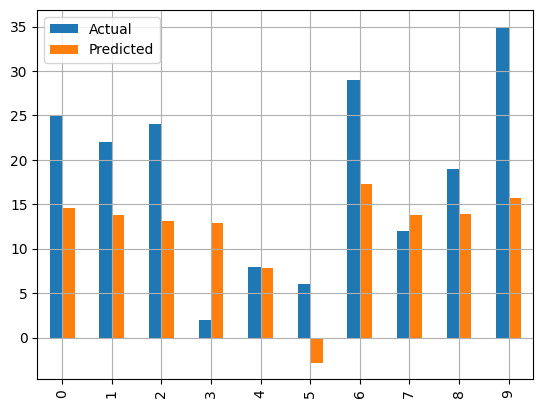

In [113]:
required_rows = 10
subset_actual_pred = actual_pred.head(required_rows)
subset_actual_pred.plot(kind='bar')
plt.grid(which='major',linewidth='0.8')
plt.grid(which='minor',linewidth='0.8')
plt.show()

**Mean Squared Error by linear regression
R2_score by Linear Regression**

In [115]:
from sklearn import metrics
from sklearn.metrics import r2_score

print("Mean Absolute error: ",metrics.mean_absolute_error(y_test,y_pred))
print("R2 score: ",r2_score(y_test,y_pred))

Mean Absolute error:  8.5742574385472
R2 score:  -0.06735274790920842


**Training and Testing Score of the Regression**

In [112]:
print("Training score: ",reg.score(x_train,y_train))
print("Testing score: ",reg.score(x_test,y_test))

Training score:  0.0888955305590835
Testing score:  -0.06735274790920842


**Accuracy by Linear Regression**

In [114]:
print('Accuracy:',reg.score(x,y)*100)

Accuracy: 2.067601034606237


**Decision Tree Classifier**

In [116]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [117]:
x_test

array([[    2,    32,    81,     3,     3, 13047],
       [   18,   116,    70,     6,    17, 17420],
       [   15,   140,    52,     5,    13, 15311],
       [   13,    45,    92,    24,    12, 14688],
       [   19,   150,    76,   100,    18, 16029],
       [   20,    29,   110,   432,    19, 16029],
       [    0,    97,   119,     2,     1, 17850],
       [   16,    61,   104,    10,    14, 16098],
       [    2,    96,    46,     8,     3, 13047],
       [   16,   105,     2,     2,    14, 16098],
       [    8,   135,    79,     6,     8, 17850],
       [   15,   126,    97,     3,    13, 15311],
       [   20,   101,   150,   192,    19, 16029],
       [   24,   119,   120,    -1,    15, 15311],
       [   10,    97,   119,     2,    10, 17850],
       [    1,    82,    57,     6,     2, 17850],
       [    5,     7,   122,    18,     5, 12583],
       [   15,    22,   113,     1,    13, 15311],
       [    5,    80,    27,    24,     5, 12583],
       [   10,   129,   146,   

In [118]:
y_test

array([25, 22, 24,  2,  8,  6, 29, 12, 19, 35, 17,  6, 16, 23, 29, 10, 15,
       24, 11, 24, 25, 11, 37, 15, 13, 15, 16, 30, 15,  3, 32,  5, 25,  6,
       24,  8,  7, 17, 13, 22,  7, 13, 19,  6, 38, 29, 10, 28, 11, 19,  5,
        4, 25,  2, 19, 24,  3,  7, 15,  5, 15,  1,  7, 30, 36,  4,  5, 34,
       14, 11,  5, 19,  8,  6,  8,  4, 12, 22, 19, 39])

In [119]:
y_pred2=clf.predict(x_test)
y_pred2

array([25, 15, 13,  8,  0, 13,  5,  8, 24, 35, 17, 13, 24, 15,  5, 10, 33,
       13,  6, 13, 22, 11, 13,  8, 28, 13, 11, 12,  9, 13, 24,  5, 11, 11,
        5,  8, 15, 17, 18, 15, 21, 13, 19, 15, 15,  5, 10, 13,  4, 15,  5,
       13, 22,  8, 21, 30, 15, 13,  1,  5, 31,  4, 13, 12, 21, 33,  5, 12,
       14, 11,  6,  3, 31, 20,  8,  8, 13, 14, 19,  4])

In [125]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)

**Mean Squared Error by DecisionTree Classifier
R2_score by Decision Tree Classifier**

In [126]:
mse=mean_squared_error(y_test,y_pred2)
r2=r2_score(y_test,y_pred2)
print("Mean Squared Error:",mse)
print("R2_Score:",r2)

Mean Squared Error: 138.6125
R2_Score: -0.3847748445265866


In [128]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred2)
print(cm)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [130]:
import seaborn as sns
import numpy as np

<Axes: >

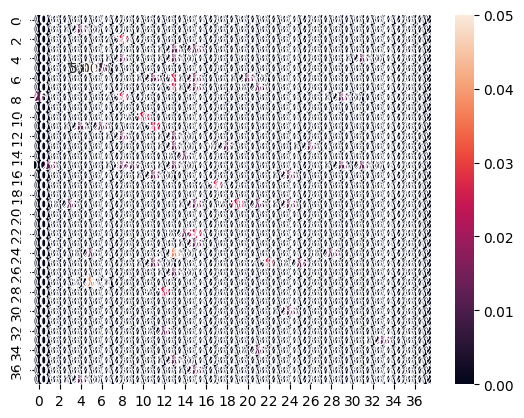

In [131]:
sns.heatmap(cm/np.sum(cm),annot=True,fmt='.2%')

In [132]:
y_test=y_test.ravel()
y_pred2=y_pred2.ravel()

In [133]:
actual_pred=pd.DataFrame({'Actual':y_test,'Predicted':y_pred2})
actual_pred

,Actual,Predicted
0,25,25
1,22,15
2,24,13
3,2,8
4,8,0
...,...,...
75,4,8
76,12,13
77,22,14
78,19,19


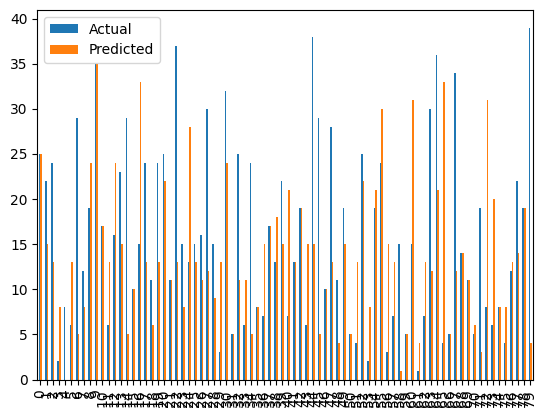

In [134]:
actual_pred.plot(kind='bar')
plt.show()

**Training and Testing Score of the Regression**

In [135]:
print("Training Score:",clf.score(x_train,y_train))
print("Testing Score:",clf.score(x_test,y_test))

Training Score: 1.0
Testing Score: 0.225


**Accuracy by Decion Tree Classifier**

In [138]:
print("Accuracy:",clf.score(x,y)*100)
from sklearn.metrics import classification_report


Accuracy: 69.0


**Classification Report:**

In [139]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         3
           5       0.50      0.80      0.62         5
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         4
           8       0.29      0.50      0.36         4
           9       0.00      0.00      0.00         0
          10       1.00      1.00      1.00         2
          11       0.40      0.50      0.44         4
          12       0.00      0.00      0.00         2
          13       0.07      0.33      0.12         3
          14       0.50      1.00      0.67         1
          15       0.00      0.00      0.00         6
          16       0.00      0.00      0.00         2
          17       1.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

**Random Forest Classifier**

In [140]:
from sklearn.ensemble import RandomForestClassifier

In [141]:
rmf=RandomForestClassifier()
rmf.fit(x_train,y_train)

<ipython-input-141-47b08110758f>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rmf.fit(x_train,y_train)


RandomForestClassifier()

In [142]:
print('The shape of x_train:',x_train.shape)
print('The shape of x_test:',x_test.shape)
print('The shape of y_train:',y_train.shape)
print('The shape of y_test:',y_test.shape)

The shape of x_train: (120, 6)
The shape of x_test: (80, 6)
The shape of y_train: (120, 1)
The shape of y_test: (80,)


In [143]:
y_pred3=rmf.predict(x_test)
y_pred3

array([25,  7, 21, 13,  8,  8,  5,  8, 12, 35, 17, 13, 24, 15,  5, 10,  4,
       15,  4, 24, 24, 11, 13,  8, 12, 13,  8, 22, 13,  1, 24,  5,  4,  8,
       24,  8, 11, 17, 18,  8, 21, 13, 19, 13, 15,  5, 10, 28, 15, 15,  5,
       13, 24, 11, 15, 24,  6, 13, 19,  5, 13,  8, 20, 12, 15,  8,  5, 25,
       14, 11,  6, 11, 13,  2,  8,  8, 35, 30, 19,  4])

**Mean Squared Error by random forest classifier
R2_score by random forest classifer**

In [144]:
mse=mean_squared_error(y_test,y_pred3)
r2=r2_score(y_test,y_pred3)
print("Mean Squared Error:",mse)
print("R2_Score:",r2)

Mean Squared Error: 102.0375
R2_Score: -0.019381103424161328


In [145]:
cm3=confusion_matrix(y_test,y_pred3)
print(cm3)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


<Axes: >

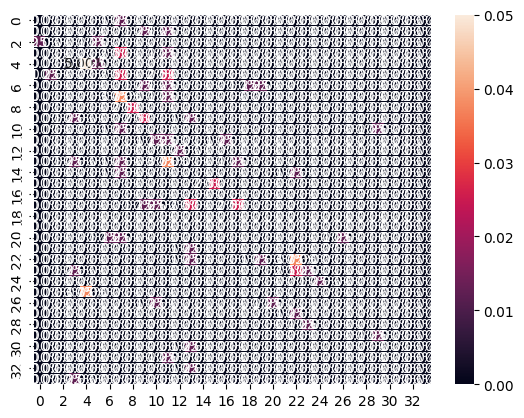

In [146]:
sns.heatmap(cm3/np.sum(cm3),annot=True,fmt='.2%')

In [147]:
y_test=y_test.ravel()
y_pred3=y_pred3.ravel()
actual_pred=pd.DataFrame({'Actual':y_test,'Predicted':y_pred3})
actual_pred

,Actual,Predicted
0,25,25
1,22,7
2,24,21
3,2,13
4,8,8
...,...,...
75,4,8
76,12,35
77,22,30
78,19,19


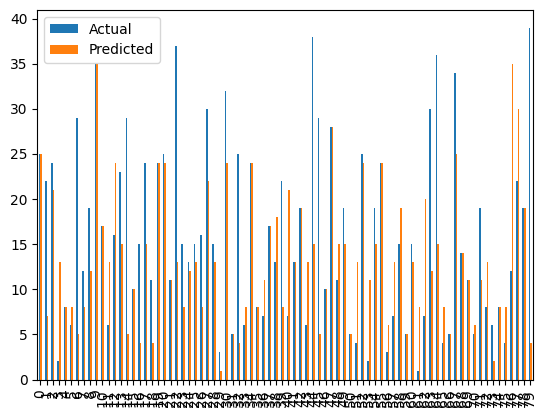

In [148]:
actual_pred.plot(kind='bar')
plt.show()

**Training and Testing Score of the Regressio**

In [149]:
print("Training Score:",rmf.score(x_train,y_train))
print("Testing Score:",rmf.score(x_test,y_test))

Training Score: 1.0
Testing Score: 0.2875


**Accuracy by random forest classifier**

In [150]:
print("Accuracy:",rmf.score(x,y)*100)

Accuracy: 71.5


**Classification Report:**

In [151]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         3
           5       0.57      0.80      0.67         5
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         4
           8       0.25      0.75      0.38         4
          10       1.00      1.00      1.00         2
          11       0.40      0.50      0.44         4
          12       0.00      0.00      0.00         2
          13       0.09      0.33      0.14         3
          14       1.00      1.00      1.00         1
          15       0.00      0.00      0.00         6
          16       0.00      0.00      0.00         2
          17       1.00      1.00      1.00         2
          18       0.00      0.00      0.00         0
          19       0.67    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

**Lasso Regression**

In [152]:
from sklearn.linear_model import Lasso
la=Lasso(alpha=1.0)
la.fit(x_train,y_train)

Lasso()

**Mean Squared Error by Lasso Regression**

In [153]:
y_pred4=la.predict(x_train)
mse=mean_squared_error(y_train,y_pred4)
print("Mean Squared Error:",mse)

Mean Squared Error: 61.91011954790786


In [154]:
from sklearn.model_selection import GridSearchCV

In [155]:
alphas=[0.01,0.1,1.0,10.0]
param_grid={'alpha':alphas}
lasso_grid=GridSearchCV(Lasso(),param_grid,cv=4)
lasso_grid.fit(x_train,y_train)

best_alpha=lasso_grid.best_params_['alpha']
print('Best Alpha:',best_alpha)

Best Alpha: 10.0


**Training and Testing Score of the Regressiom**

In [156]:
print("Training Score:",la.score(x_train,y_train))
print("Testing Score:",la.score(x_test,y_test))

Training Score: 0.08286965671885149
Testing Score: -0.06743452202740419


**Accuracy by Lasso Regression**

In [157]:
print("Accuracy:",la.score(x,y)*100)

Accuracy: 1.7634448042342377


**Suppor vector machine regression**

In [158]:
from sklearn.svm import SVR
sv=SVR()
sv.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [159]:
print('The shape of x_train:',x_train.shape)
print('The shape of x_test:',x_test.shape)
print('The shape of y_train:',y_train.shape)
print('The shape of y_test:',y_test.shape)

The shape of x_train: (120, 6)
The shape of x_test: (80, 6)
The shape of y_train: (120, 1)
The shape of y_test: (80,)


In [160]:
y_pred4=sv.predict(x_test)
y_pred4

array([12.48588357, 13.12534069, 12.8147635 , 12.72198986, 12.92170291,
       12.92104646, 13.18550258, 12.93245592, 12.48578389, 12.93268793,
       13.1854864 , 12.81465408, 12.92134858, 12.81460274, 13.18549619,
       13.18577277, 12.42294312, 12.81497444, 12.42302006, 13.18527089,
       12.95532736, 12.93254422, 12.42258033, 13.2163925 , 13.18523854,
       12.81495027, 12.92160349, 12.95546786, 12.8149421 , 12.42278874,
       12.48596571, 13.1857492 , 12.93239174, 12.81465295, 12.48553829,
       12.95517166, 12.81509269, 13.18537863, 12.81179796, 12.81481327,
       12.81507719, 13.18518853, 12.42305419, 12.81465957, 13.12522794,
       13.18549759, 13.18578005, 13.18525016, 12.8153112 , 12.93241178,
       13.18571553, 12.81447904, 12.95525429, 12.72199706, 12.93271961,
       12.48586776, 12.42280507, 13.2164055 , 12.42303743, 13.18574893,
       12.81493883, 12.72183698, 12.92113924, 12.48579676, 12.93226662,
       12.72203549, 13.18571694, 13.21681732, 13.18564243, 12.72

**Mean Squared Error by SVR
R2_score by SVR**

In [161]:
mse=mean_squared_error(y_test,y_pred4)
r2=r2_score(y_test,y_pred4)
print("Mean Squared Error:",mse)
print("R2_Score:",r2)

Mean Squared Error: 110.31107818929505
R2_Score: -0.10203629650385904


In [162]:
y_test=y_test.ravel()
y_pred4=y_pred4.ravel()

In [163]:
actual_pred=pd.DataFrame({'Actual':y_test,'Predicted':y_pred4})
actual_pred

,Actual,Predicted
0,25,12.485884
1,22,13.125341
2,24,12.814764
3,2,12.721990
4,8,12.921703
...,...,...
75,4,12.722045
76,12,12.814970
77,22,12.485750
78,19,12.423054


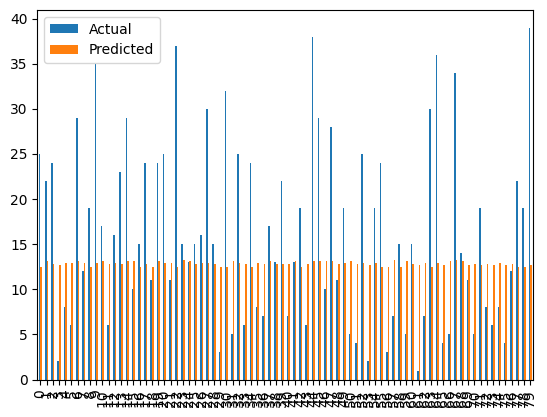

In [164]:
actual_pred.plot(kind='bar')
plt.show()

**Training and Testing Score of the Regressiom**

In [165]:
print("Training Score:",sv.score(x_train,y_train))
print("Testing Score:",sv.score(x_test,y_test))

Training Score: -0.022310050913606272
Testing Score: -0.10203629650385904


**Accuracy by SVR**

In [166]:
print("Accuracy:",sv.score(x,y)*100)

Accuracy: -5.178911366267425
